# 1.1 Overview of Time Series Characteristics

In this lesson, we'll describe some important features that we must consider when describing and modeling a time series. This is meant to be an introductory overview, illustrated by example, and not a complete look at how we model a univariate time series. Here, we'll only consider univariate time series. We'll examine relationships between two or more time series later on.

First, let's import the python modules we'll be using in this document.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

/vagrant/environs/sklearn/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## *Definition*
A **univariate time series** is a sequence of measurements of the same variable collected over time. Most often, the measurements are made at regular time intervals.

One difference from standard linear regression is that the data are not necessarily independent and not necessarily identically distributed. One defining characteristic of time series is that this is a list of observations where the ordering matters. Ordering is very important because there is dependency and changing the order could change the meaning of the data.

## Basic objectives of the Analysis
The basic objective usually is to determine a model that describes the pattern of the time series. Uses for such a model are
1. To describe the important features of the time series pattern.
2. To explain how the past affects the future or how two time series can "interact".
3. To forecast future values of the series.
4. To possibly serve as a control standard for a varible that measures the quality of product in some manufacturing situations.

## Types of Models
There are two basic types of "time domain" models.
1. Models that relate the present value of a series to past values and past prediction errors - these are called ARIMA models (for AutoRegressive Integrated Moving Average). We'll spend substantial time on these.
2. Ordinary regression models that use time indices as $x$-variables. These can be helpful for an initial description of the data and form the basis of several simple forecasting methods.

## Important Characteristics to Consider First
Some important questions to first consider when first looking at a time series are
* Is there a **trend**, meaning that, on average, the measurements tend to increase (or decrease) over time?
* Is there **seasonality**, meaning that there is a regular repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
* Are there **outliers**? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
* Is ther a **long-run cycle** or period unrelated to seasonality factors?
* Is there **constant variance** over time, or is the variance non-constant?
* Are there any abrupt changes to either the level of the series or the variance?

## Example 1
The following plot is a time series plot of the annual number of earthquakes in the world with seismic magnitude over 7.0, for 99 consecutive years. By a time series plot, we simply mean that the variable is plotted against time.

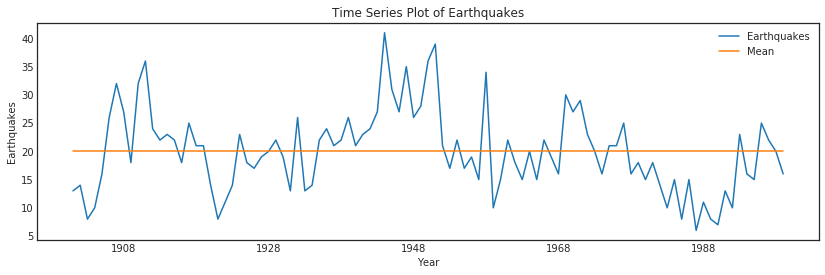

In [2]:
quakes = pd.read_csv("../data/quakes.csv")
idx = pd.to_datetime(quakes['Index'])
quakes['Index'] = idx

plt.figure(figsize=(14, 4))

plt.plot(idx,
         quakes['Earthquakes'],
         label="Earthquakes")

plt.plot(idx,
         [quakes['Earthquakes'].mean()]*len(idx),
         label="Mean")

plt.xlabel("Year")
plt.ylabel("Earthquakes")
plt.title("Time Series Plot of Earthquakes")
plt.legend()
plt.show()

Some features of the plot:
* There is **no consistent trend** (upward or downward) over the entire time span. The series appears to slowly wander up and down. The horizontal line drawn at 20.2 indicates the mean of the series. Notice that the series tends to stay on the same side of the mean (above or below) for a while and then wanders to the other side.
* Almost by definition, there is **no seasonality** as the data are annual data.
* There are **no obvious outliers**.
* It's difficult to judge whether the variance is constant or not.

One of the simplest ARIMA type models is a model in which we use a linear model to predict the value at the present time using the value at the previous time. This is called an **AR(1) model**, standing for **autoregressive model of order 1**. The order of the model indicates how many previous times we use to predict the present time.

A start in evaluating whether an AR(1) might work is to plot values of the series against **lag 1 values** of the series. Let $x_t$ denote the value of the series at any particular time $t$, so $x_{t - 1}$ denotes the value of the series one time before time $t$. That is, $x_{t - 1}$ is the lag 1 value of $x_t$. As a short example, here are the first five values in the earthquake series along with their lag 1 values:

In [3]:
quakes['Lag1'] = quakes['Earthquakes'].shift(1)
quakes.head(5)

,Index,Earthquakes,Lag1
0,1900-12-31,13.0,NaN
1,1901-12-31,14.0,13.0
2,1902-12-31,8.0,14.0
3,1903-12-31,10.0,8.0
4,1904-12-31,16.0,10.0


For the complete earthquake data set, here's a plot of $x_t$ versus $x_{t - 1}$:

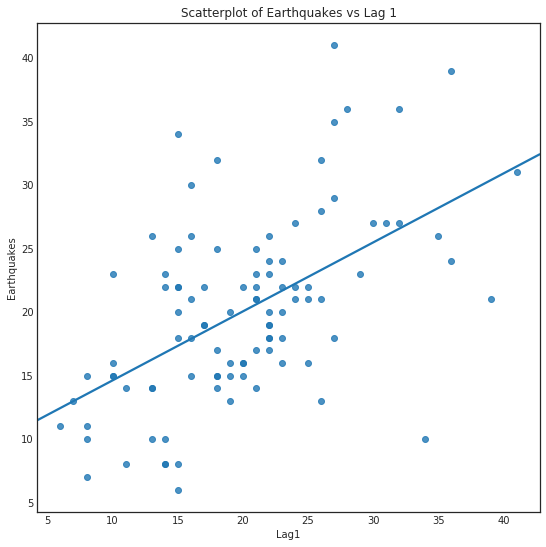

In [4]:
plt.figure(figsize=(9, 9))

# Use sns.regplot to make scatterplot with regression line
sns.regplot(quakes['Lag1'],
            quakes['Earthquakes'],
            ci=None)

plt.title("Scatterplot of Earthquakes vs Lag 1")
plt.show()

Although, it's only a moderately strong relationship, there is a positive linear association so an AR(1) model might be a useful model.

## The AR(1) Model
Theoretically, the AR(1) model is written

\begin{equation*}
    x_{t} = \delta + \phi_1 x_{t - 1} + w_t
\end{equation*}

Assumptions:
* $w_t \overset{\text{iid}}{\sim} N(0, \sigma_w^2)$, meaning that the errors are independently distributed with a normal distribution that has mean 0 and constant variance.
* Properties of the errors $w_t$ are independent of $x$

This is essentially the ordinary simple linear regression equation, but there is one difference. Although it's not usually true, in ordinary least squares regression we assume that the $x$-variable is not random, but instead is something we can control. That's not the case here, but in our first encounter with time series we'll overlook that and use ordinary regression methods. We'll do things the "right" way later in the course.

Following is the `statsmodels` output for the AR(1) regression in this example:

In [5]:
y = quakes['Earthquakes']
X = quakes['Lag1']
X = sm.add_constant(X)

quakes_model = sm.regression.linear_model.OLS(y, X, missing='drop')
quakes_results = quakes_model.fit()

quakes_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Earthquakes   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     40.60
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           6.47e-09
Time:                        08:24:54   Log-Likelihood:                -315.62
No. Observations:                  98   AIC:                             635.2
Df Residuals:                      96   BIC:                             640.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1907      1.819      5.052      0.000       5.580      12.802
Lag1           0.5434      0.085      6.372      0.000       0.374       0.713
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.882
Skew:                           0.388   Prob(JB):                        0.144
Kurtosis:                       3.591   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the slope coefficient is different from 0, so the lag 1 variable is a helpful predictor. The $R^2$ value is relatively weak at $29.7\%$, though, so the model won't give us great predictions.

## Residual Analysis
In traditional regression, a plot of residuals versus fits is a useful diagnostic tool. The ideal for this plot is a horizontal band of points. Following is a plot of residuals versus predicted values for our estimated model. It doesn't show any serious problems. There might be one possible outlier at a fitted value of about 28.

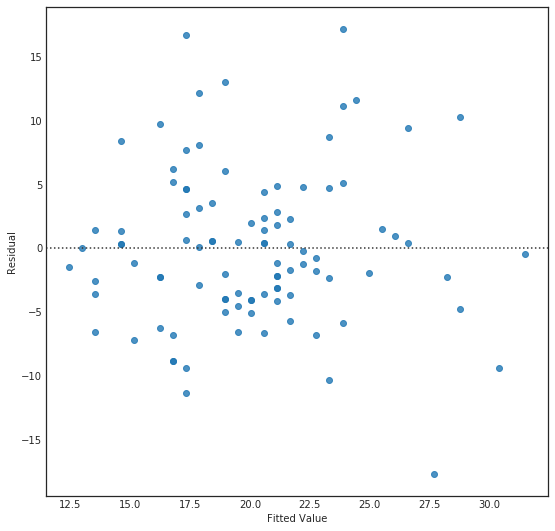

In [6]:
plt.figure(figsize=(9, 9))

# Use quakes.dropna() since the lagged value has a NaN that we don't want to use
sns.residplot(quakes_results.fittedvalues,
              "Earthquakes",
              data=quakes.dropna())

plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

## Example 2
The plot below shows a time series of quarterly production of beer in Australia for 18 years.

Some important features are
* There is an upward trend, possibly a curved one.
* There is seasonality - a regularly repeating pattern of highs and lows related to quarters of the year.
* There are no obvious outliers.
* There might be increasing variation as we move across time, although that's uncertain.

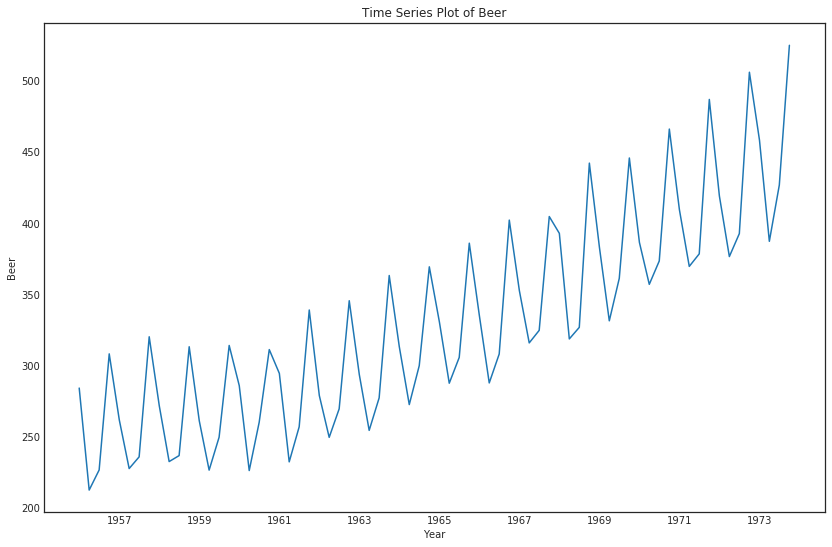

In [7]:
beer = pd.read_csv("../data/beer.csv")
beer['Index'] = pd.to_datetime(beer['Index'])

plt.figure(figsize=(14, 9))

plt.plot(beer['Index'],
         beer['Beer'],
         label="Beer")

plt.xlabel("Year")
plt.ylabel("Beer")
plt.title("Time Series Plot of Beer")
plt.show()

There are ARIMA methods for dealing with series that exhibit both trend and seasonality, but for this example we'll use ordinary regression methods.

## Classical Regression Methods for Trend and Seasonal Effects
To use traditional regression methods, we might model the pattern in the beer production data as a combination of trend over time and quarterly effect variables.

Suppose that the observed series is $x_t$, for $t = 1, 2, \ldots, n$.
* For a linear trend, use $t$ (the time index) as a predictor variable in the regression.
* For a quadratic trend, we might consider using both $t$ and $t^2$.
* For quarterly data, with possible seasonal (quarterly) effects, we can define indicator variables such as $S_j = 1$ if observation is in quarter $j$ of a year and 0 otherwise. There are 4 such indicators.

Let $\epsilon_t \overset{\text{iid}}{\sim} N(0, \sigma^2)$. A model with additive components for linear trend and seasonal (quarterly) effects might be written

\begin{equation*}
    x_t = \beta_1 t + \alpha_1 S_1 + \alpha_2 S_2 + \alpha_3 S_3 + \alpha_4 S_4 + \epsilon_t
\end{equation*}

To add a quadratic trend, which may be the case in our example, the model is

\begin{equation*}
    x_t = \beta_1 t + \beta_2 t^2 + \alpha_1 S_1 + \alpha_2 S_2 + \alpha_3 S_3 + \alpha_4 S_4 + \epsilon_t
\end{equation*}

Note that we've deleted the "intercept" from the model. This isn't necessary, but if we include it we'll have to drop one of the seasonal effect variables from the model to avoid collinearity issues.

## Back to Example 2
Below is the `statsmodels` output for a model with a quadratic trend and seasonal effects. All factors are statistically significant.

In [8]:
# Add time and time squared columns
beer['Time'] = range(1, beer.shape[0] + 1)
beer['TimeSqr'] = beer['Time'].map(lambda x: x*x)

# We want to extract the quarter from the datetime index
def quarter(row):
    return row['Index'].quarter

# Create a new column with this quarter info
beer['Quarter'] = beer.apply(quarter, axis=1)

# Add dummy variables for the quarter
dummies = pd.get_dummies(beer['Quarter'])
dummies.columns = ['Q{}'.format(e) for e in dummies.columns]

# Add the dummy variable columns and remove the Quarter column
beer = beer.join(dummies)
beer.drop("Quarter", inplace=True, axis=1)

In [9]:
y = beer['Beer']
X = beer[['Time', 'TimeSqr', 'Q1', 'Q2', 'Q3', 'Q4']]
beer_model = sm.OLS(y, X)

beer_results = beer_model.fit()
beer_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Beer   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     829.2
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           4.04e-58
Time:                        08:24:55   Log-Likelihood:                -261.42
No. Observations:                  72   AIC:                             534.8
Df Residuals:                      66   BIC:                             548.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time           0.5881      0.219      2.682      0.009       0.150       1.026
TimeSqr        0.0312      0.003     10.724      0.000       0.025       0.037
Q1           261.9302      3.937     66.525      0.000     254.069     269.791
Q2           212.1647      3.968     53.475      0.000     204.243     220.086
Q3           228.4146      3.994     57.183      0.000     220.439     236.390
Q4           310.8799      4.018     77.370      0.000     302.857     318.902
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.932
Skew:                           0.073   Prob(JB):                        0.628
Kurtosis:                       3.538   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Analysis
For this example, the plot of residuals versus fits doesn't look too bad, although we might be concerned by the string of positive residuals at the far right.

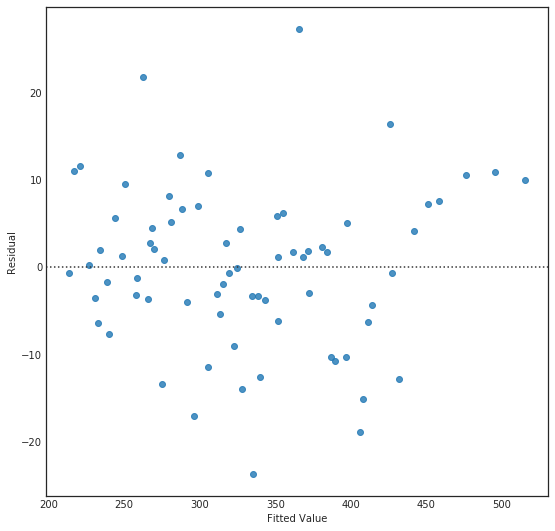

In [10]:
plt.figure(figsize=(9, 9))

# Use quakes.dropna() since the lagged value has a NaN that we don't want to use
sns.residplot(beer_results.fittedvalues,
              "Beer",
              data=beer)

plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

When data are gathered over time, we typically are concerned with whether a value at the present time can be predicted form values at past times. We saw this in the earthquake data of example 1 when we used an AR(1) structure to model the data. For residuals, however, the desirable result is that the correlation is 0 between residuals separated by any given time span. In other words, residuals should be unrelated to each other.

## Sample Autocorrelation Function (ACF)
The sample autocorrelation function (ACF) for a series gives correlations between the lagged series $x_t$ and lagged values of the series of 1, 2, 3, and so on. The lagged values can be written as $x_{t - 1}, x_{t - 2}, x_{t - 3}$, and so on. The ACF gives correlations between $x_t$ and $x_{t - 1}$, $x_t$ and $x_{t - 2}$, and so on.

The ACF can be used to identify the possible structure of time series data. That can be tricky going as there often isn't a single clear-cut interpretation of a sample autocorrelation function. We'll get started on that in Lesson 1.2. The ACF of the residuals for a model is also useful. The ideal for a sample ACF of residuals is that there aren't any significant correlations for any lag.

Following is the ACF of the residuals for the Example 1, the earthquake example, where we used an AR(1) model. The "lag" (time span between observations) is shown along the horizontal, and the autocorrelation is on the vertical. The blue bars indicate bounds for statistical significance. This is a good ACF for residuals. Nothing is significant; that's what we want for residuals.

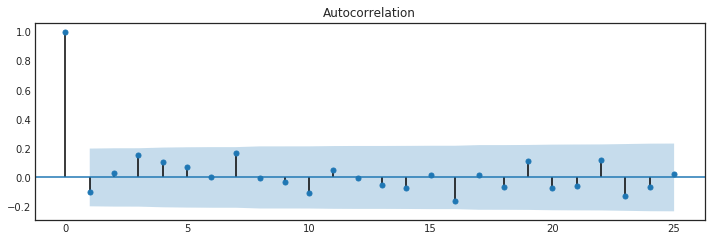

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quakes_results.resid, lags=25, ax=ax1)
plt.show()

The ACF of the residuals for the quadratic trend plus seasonality model we used in Example 2 looks good too. Again, there appears to be no significant autocorrelation in the residuals. The ACF of the residuals is below:

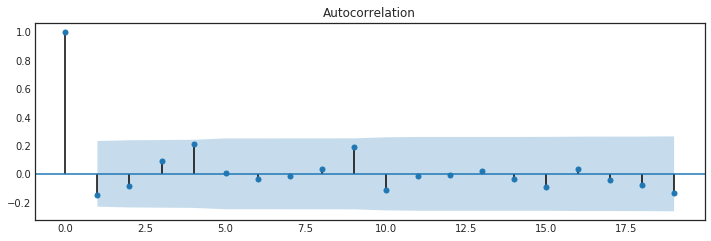

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(beer_results.resid, lags=19, ax=ax1)
plt.show()

Lesson 1.2 will give more details about the ACF.